In [1]:
import plot_utils as pu

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
df = pd.read_csv("./data/simulations_kraken_centrifuge.txt", delimiter=",", index_col=0)

In [4]:
df.dtypes

aligner         object
depth            int64
tp               int64
fp               int64
fn               int64
precision      float64
recall         float64
f1             float64
level           object
site            object
spearman       float64
pearson        float64
jaccard        float64
depth_log10    float64
dtype: object

In [5]:
df.head()

,aligner,depth,tp,fp,fn,precision,recall,f1,level,site,spearman,pearson,jaccard,depth_log10
0,BURST 95,1012,901,15,96,0.983624,0.903711,0.943668,species,stool,0.971300,0.920157,0.25,3.0
1,BURST 95,1012,919,2,91,0.997828,0.909901,0.953865,species,oral,0.946423,0.799821,0.35,3.0
2,BURST 95,1012,1002,1,9,0.999003,0.991098,0.995050,species,skin,0.641937,0.681264,0.07,3.0
3,BURST 95,1012,894,9,109,0.990033,0.891326,0.940680,species,stool,0.933395,0.866673,0.22,3.0
4,BURST 95,1012,929,5,78,0.994647,0.922542,0.958594,species,oral,0.938274,0.825210,0.38,3.0


In [6]:
# df = df.sort_values("tool")

df_means = df.groupby(["aligner", "site"]).mean().reset_index()

# tools = ["burst", "bowtie2", "centrifuge", "kraken", "utree"]
# index_tools = dict(zip(tools, range(len(tools))))

# df_means["index_tools"] = df_means.tool.map(index_tools)


# display_names = dict(zip(tools, ["BURST", "Bowtie2", "Centrifuge", "Kraken", "UTree"]))

# df_means["display_names"] = df_means.tool.map(display_names)

# colors = dict(zip(tools, ["#1a1895", "#000000", "#0c5050", "#148d4a", "#bd86e8"]))

# df_means["colors"] = df_means.tool.map(colors)

# markers = dict(zip(tools, ["s", "v", "o", "^", "d"]))

# df_means["markers"] = df_means.tool.map(markers)
# df_means.sort_values('index_tools', inplace=True)

In [7]:
df_means.columns

Index(['aligner', 'site', 'depth', 'tp', 'fp', 'fn', 'precision', 'recall',
       'f1', 'spearman', 'pearson', 'jaccard', 'depth_log10'],
      dtype='object')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


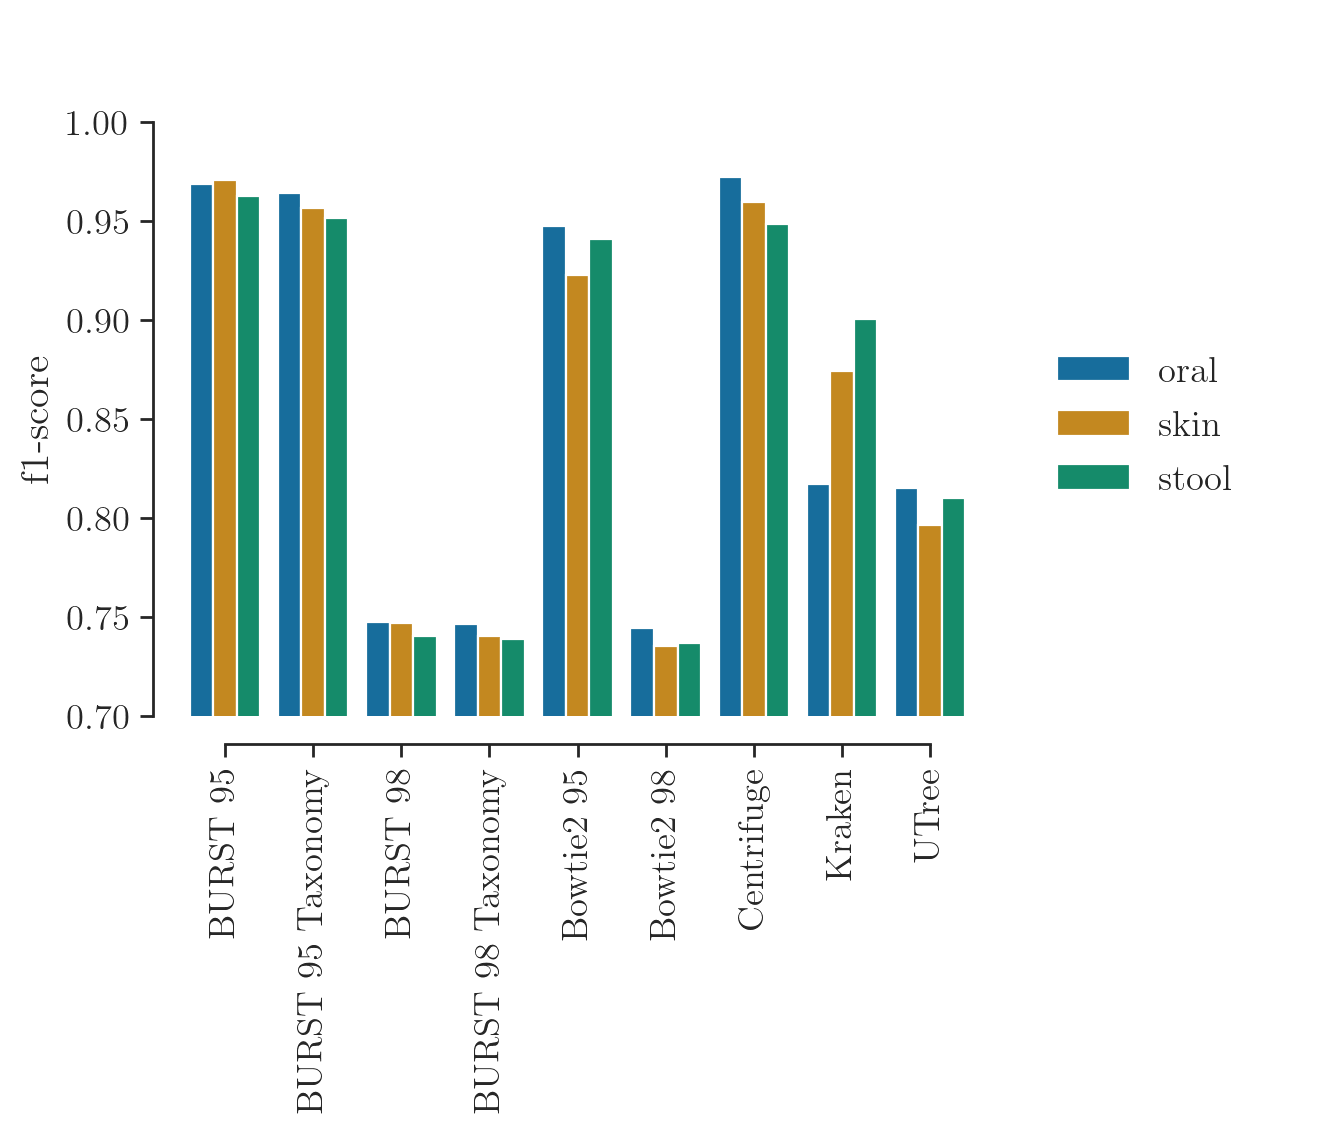

In [8]:
# We are interested in the speed up and efficiency of each of the aligners
# y-axis: RAM Usage
# x-axis: N (workers)
# sns.set_style("whitegrid")

sns.set(context="paper", style="ticks", palette="colorblind", font='serif', font_scale=1.5, color_codes=True, rc=pu.figure_setup())
fig_size = pu.get_fig_size(13, 10)
fig, ax = plt.subplots(figsize=fig_size)

plot = sns.barplot(x="aligner", y="f1", hue="site", data=df_means, ax=ax)
plot._remove_legend(plot.get_legend())

ax.set_ylim(.7, 1.0)

pu.stylize_axes(ax)
pu.stylize_fig(fig)

for item in ax.get_xticklabels():
    item.set_rotation(90)
    
ax.set_ylabel('f1-score')
ax.set_xlabel('')


artists = fig.legend(loc="center left", bbox_to_anchor=(1, .9))
artists.set_frame_on(False)
pu.save_plot(fig, "simulations", artists=(artists,))

In [9]:
# artists.